<a href="https://colab.research.google.com/github/Yanlecun/intro_ml_notebooks/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%892_EDA_To_Prediction(Dietanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

sometimes life has a cruel sense of humor, giving you the thing you always wanted at the worst time possible

sources by : https://www.kaggle.com/ash316/eda-to-prediction-dietanic

In [1]:
# 캐글 설치하기
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"songwookim","key":"7823cc64286c8d91ee63339925529399"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c titanic

train.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
        #print(os.path.join(dirname, filename))


# (0) 개요
<p>
2224명 중 1502의 사상자를 내어 'Dietanic'이라고 지었다.
특징을 체크, 새로운 특징을 추가하며 머신러닝의 개념을 곁들이는 과정으로 <br> 예측 모델링 문제의 작업흐름이 어떤지에 대한 관점을 줄 것이다.
</p>

1. EDA
    1. 특징에 대한 분석
    2. 다양한 특징을 고려한 특징 사이의 관계성이나 방향성 탐색
2. Feature Engineering and Data Cleaning
    1. 특징 추가
    2. 관계 의존도 높은 특징 제거
    3. 특징들을 모델링을 위해 적절한 형태로 변형
3. Predictive Modeling
    1. 기본 알고리즘
    2. Cross Validation
    3. 앙상블
    4. 중요한 특징 추출

# (1) EDA

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
data = pd.read_csv('train.csv')

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 데이터 결측치 확인

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Embarked 값에 결측치가 있음

## 얼마나 많이 살아남았을까?

Text(0.5, 1.0, 'Survived')

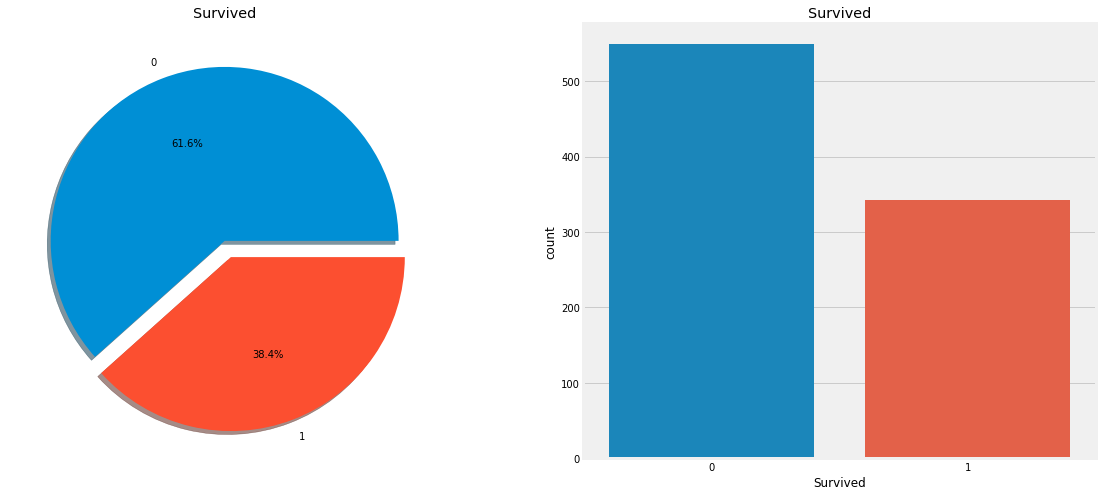

In [11]:
f, ax = plt.subplots(1,2,figsize=(18,8))

# Pie Chart
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax= ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')


train dataset에 의하면 38.4%가 생존했다는 것을 알 수 있었는데, 더 나은 관점을 위해 각 특징과 생존비율에 대한 관계성을 살펴보자.

## Feature 살펴보기

### 1. 범주형 특징
- sex, embarked같이 상대적 순서는 없어 순서 정렬할 수 없는 특징

### 2. Ordinal 특징
- Height(Tall, Midium, short)값에 상대적 순서가 있어 순서정렬이 가능한 범주형 특징


### 3. Continous 특징
- Age처럼 이진값이나 최대/최소값을 가진 특징 

## Feature 분석

### (1) 범주형 특징(sex)    

In [12]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Sex: Survived vs Sex')

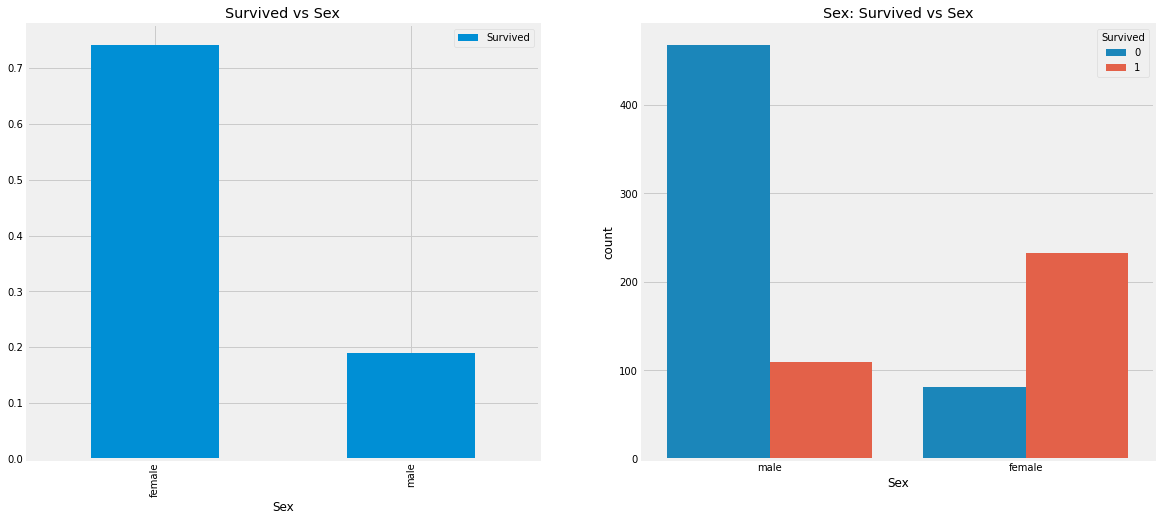

In [13]:
f, ax = plt.subplots(1,2, figsize=(18,8))

data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data,ax=ax[1])
ax[1].set_title('Sex: Survived vs Sex')

### (2) Ordinal 특징 (Pclass)

In [14]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass: Survived vs Dead')

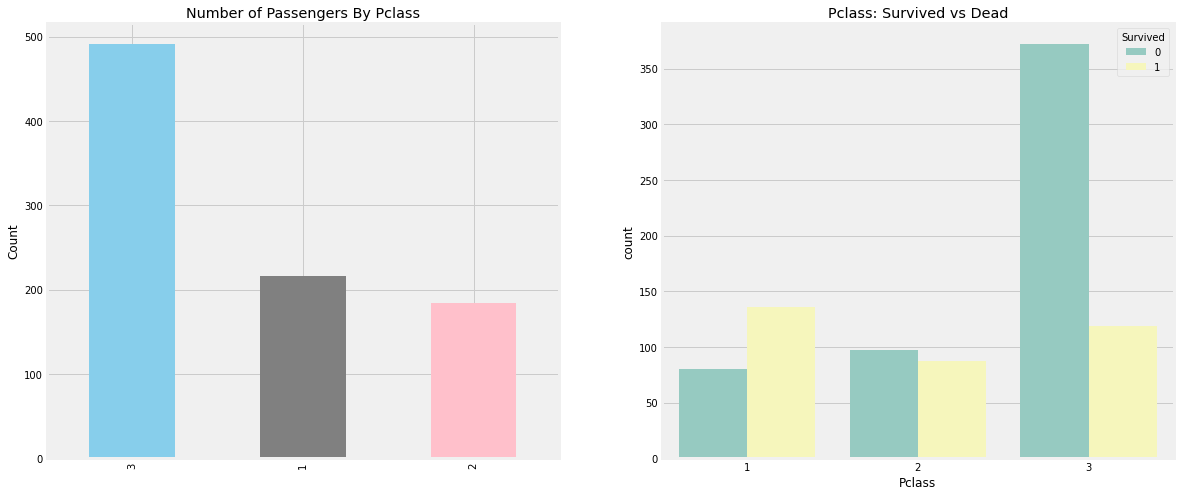

In [15]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['skyblue','gray','pink'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', palette='Set3', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')


퍼스트 클래스가 가장 높은 생존확률을 나타내고 있다. <br>Sex와 Pclass 간의 관계를 살펴보자

In [16]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient('summer_r')

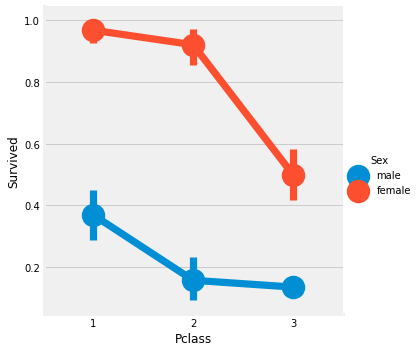

In [17]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)

**factorplot는 범주형의 데이터를 쉽게 분리한다는 장점이 있다.**
<br> <p>Pclass 1인 여성이 94%의 생존률을 보여주고 있으며, Pclass 관계없이 여성의 생존률이 높은 것을 보았을 때 여성 먼저 구조된 것을 추론할 수 있다.</p>

### (3) Continous 특징 (Age)

In [18]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average age ont the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average age ont the ship: 29.69911764705882 Years


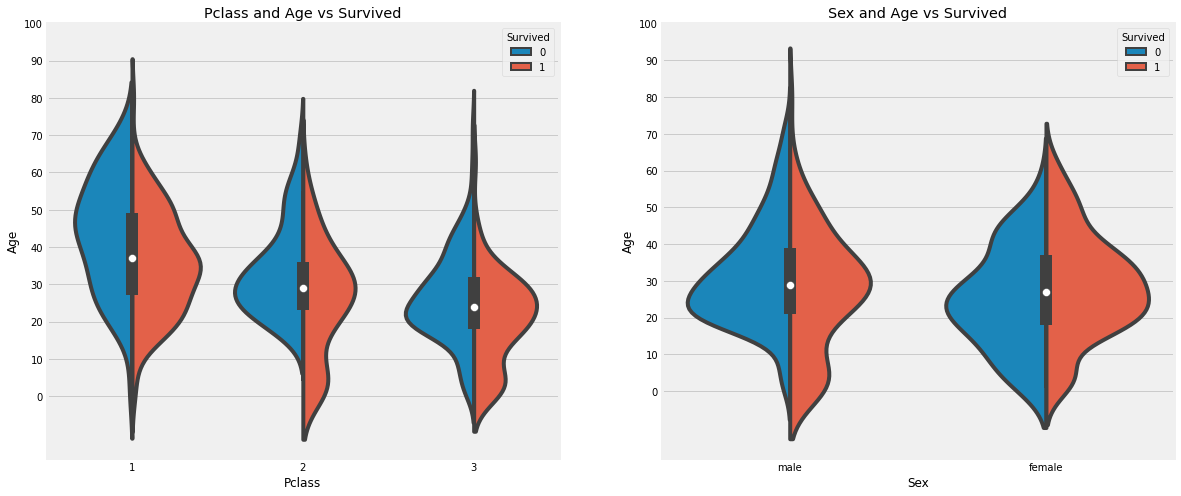

In [19]:
f, ax = plt.subplots(1,2, figsize=(18,8))

sns.violinplot('Pclass', 'Age', hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

1. 10살 이하의 경우, Pclass 특징의 영향에 관계없다.
2. 20-50살 사이의 대한 생존은 Pclass의 영향을 받으며, 역시 여자 쪽에서 좀 더 높은 생존률을 보이고 있다.
3. 남자의 경우, 나이와 생존률이 반비례 관계임을 확인할 수 있다.

#### 결측치 채우기

Age의 결측치는 평균치로 채우는데, 4살 배기한테 29살을 넣을 수는 없다.. **Name 특징**을 이용해보자
<br> Mr, Mrs 처럼 각각의 Name 특징 그룹으로 나눠 그 그룹의 나이의 평균값으로 결측치를 채우면 더 나을 것이다.

In [20]:
data['Initial'] = 0
for i in data :
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # Salutations 추출

In [21]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient('summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


misspelled 이니셜들을 한 단위로 모으자

In [22]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [23]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [24]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age']=46

In [25]:
data.Age.isnull().any()

False

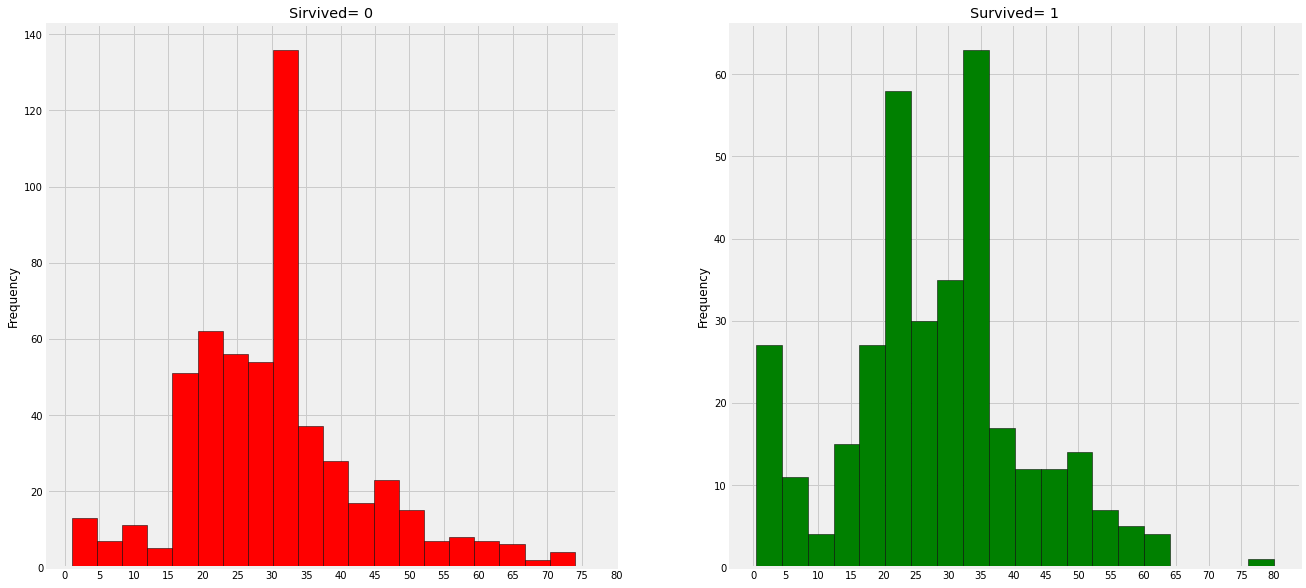

In [26]:
f, ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Sirvived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()        

1. 5살 미만의 애기들 또한 높은 구조 우선순위였음
2. 80 years was saved
3. 30-40대가 제일 많이 사망하였음

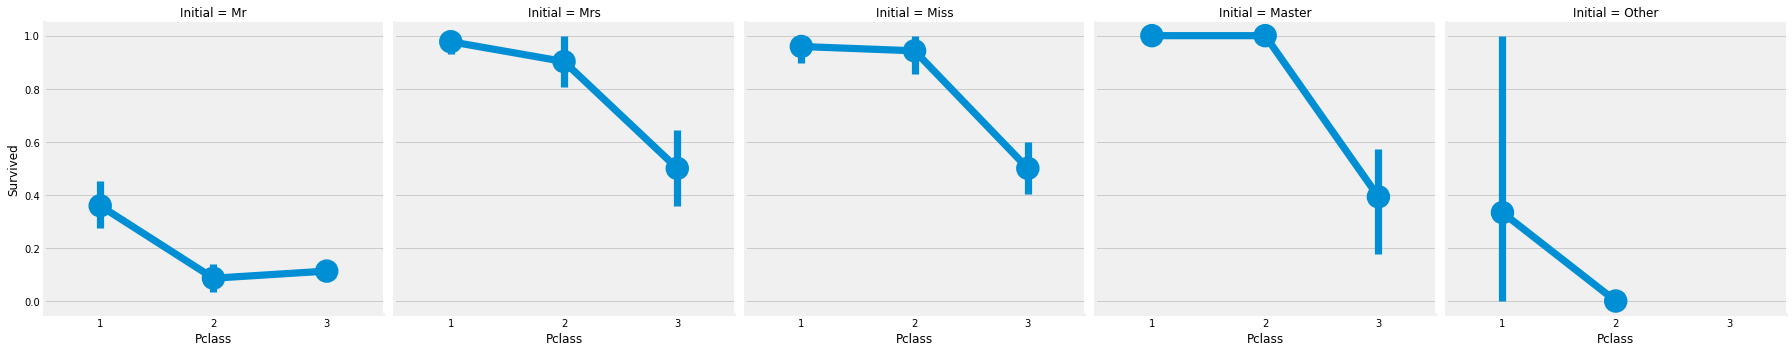

In [27]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

class상관없이 여자와 아이가 우선으로 구조되었음을 알 수 있다.

### (4) 범주형 특징 (Embarked)

In [28]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient('summer_r')

**Embarkation에 따른 생존 기회**

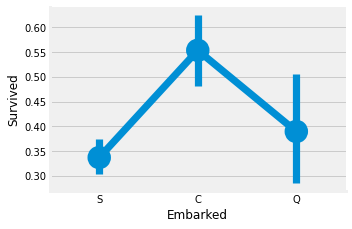

In [29]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

C는 55%가까이인 반면, S가 가장 낮은 생존확률을 보여주었다.

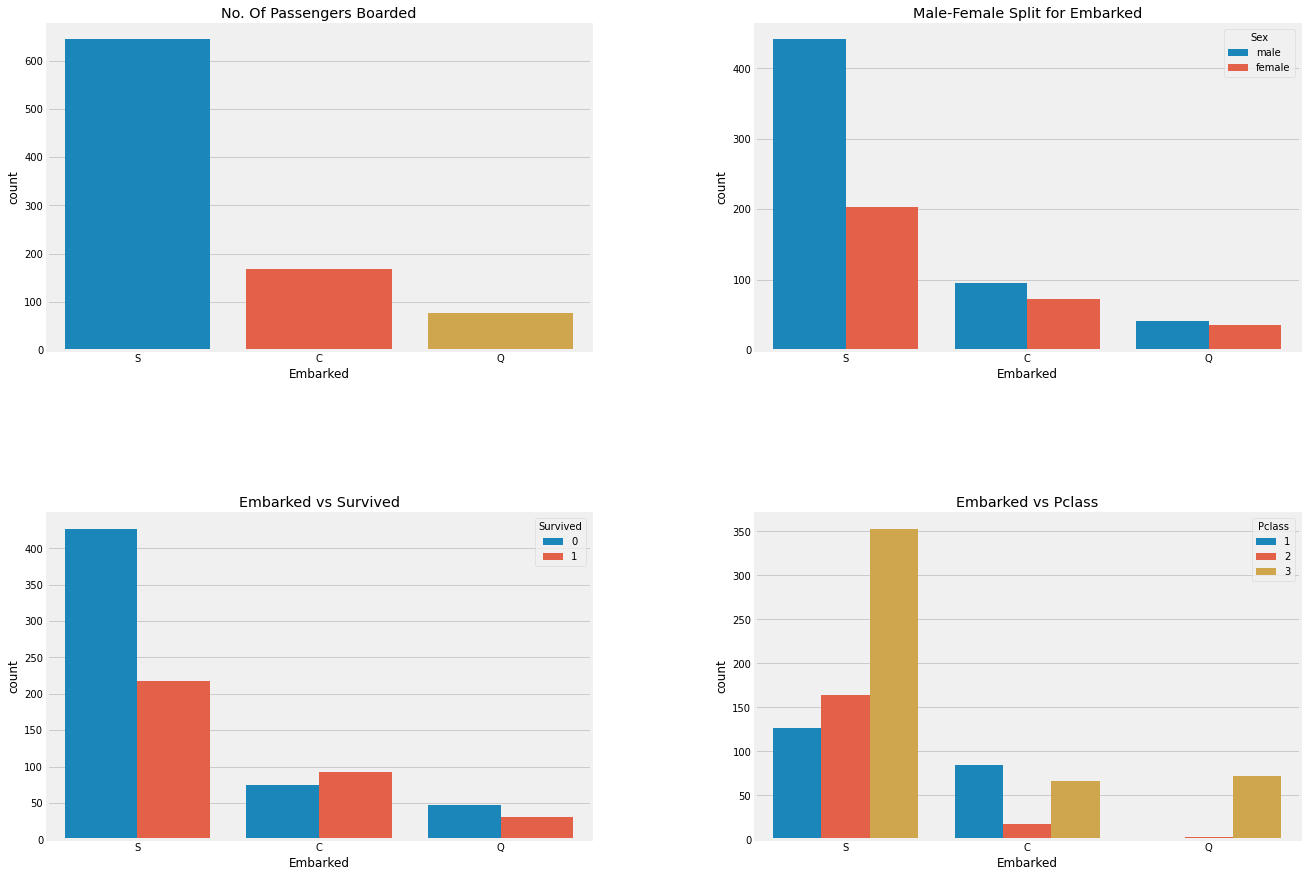

In [30]:
f,ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

1. S에서 가장 많이 탑승했고 대부분은 Pclass 3
2. C에서 탑승한 사람들이 생존을 많이 했는데, 생존자 중 대부분이 Pclass1,2 일 것으로 추정된다.
3. S가 부유한 사람 대다수가 탑승 한 것으로 보이나 Pclass3 고객이 많이 살아남지 못해 생존확률이 낮아보인다.
4. Q는 95%가 Pclass3 고객이다.

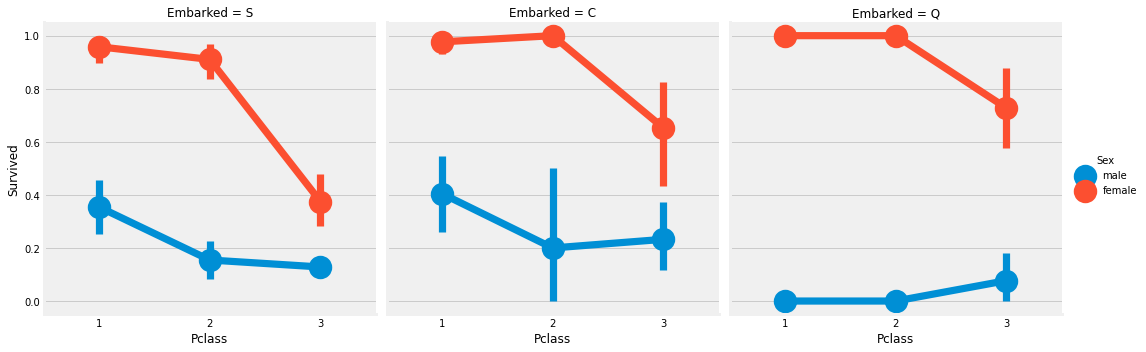

In [31]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

1. Pclass 관계없이 Pclass 1,2인 여자가 구조 우선순위가 높았다는 것을 알 수 있었다.
2. port S의 경우 남녀 모두 Pclass3 생존률이 낮다.
3. port Q에서 탑승한 Pclass3 남자가 가장 불운했다.

#### 결측치 채우기 <br>
S에서 가장 많은 탑승객들이 탑승했기에 NaN을 S로 채우자.

In [32]:
data['Embarked'].fillna('S', inplace=True)

In [33]:
data.Embarked.isnull().any()

False

### (5) 이진 특징 (SibSp)
혼자냐 가족과 함께 탔느냐를 나타내는 특징. Sibling = bro,sis,stepbro,stepsis / Spouse = husband,wife

In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [35]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient('Pastel2')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


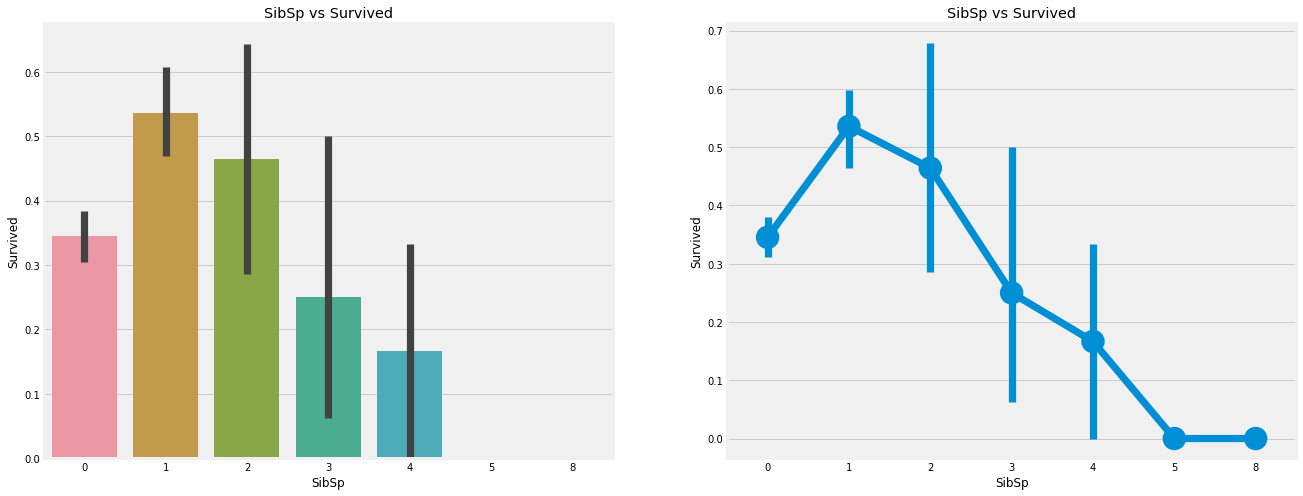

In [36]:
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.pointplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.show()

In [37]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient('Pastel2')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


가족이 없는 탑승객은 34.5%의 생존률을 보였다. 가족이 있을 경우 생존확률이 급격히 떨어졌고 이는 나보다 가족이 우선이라는 의식 때문에 떨어진 것으로 보인다. 다만 5명 이후에는 생존률이 0%인데 Pclass때문일까 ? <br>
crosstab 그래프를 참고하였을 때 **Pclass를 이유로 5명 이후에는 생존률이 낮았다고 볼 수 있다.**

### (6) Discrete 특징 (Parch (부모, 자녀))

In [38]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient('Pastel1_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


더많은 가족들이 Pclass3에 소속되어 있다는 것을 알 수 있었다.

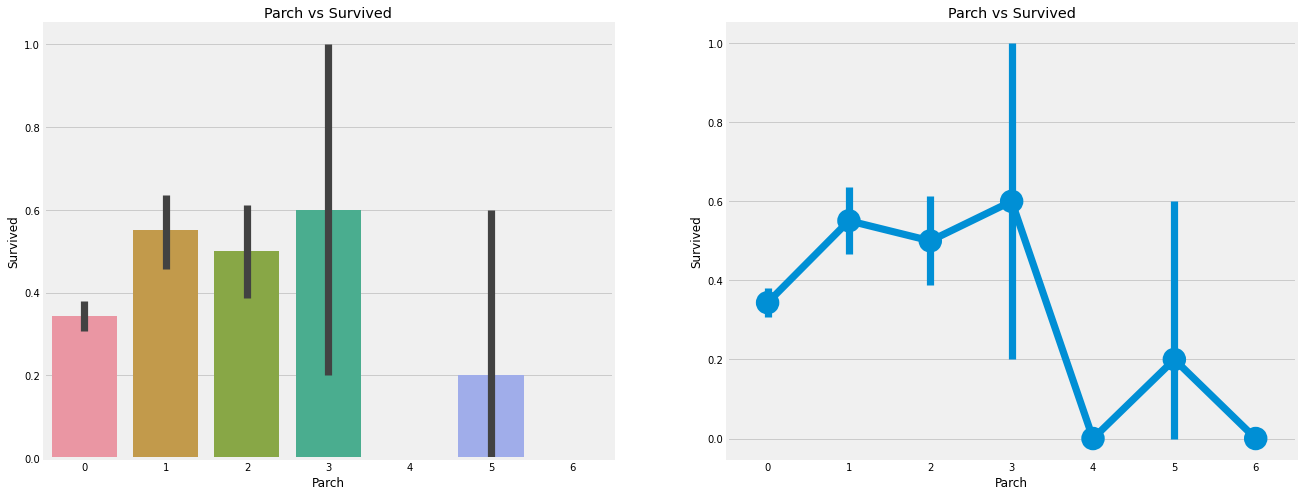

In [39]:
f, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.pointplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.show()

2개의 결과가 비슷한데, 가족이 1-3명 있을 경우 생존률이 높아지지만, 일정 수 이상의 경우 급격히 떨어졌으며, 혼자일 경우에도 낮은 경향을 보였다.

### (7) Continous 특징 (Fare)

In [40]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


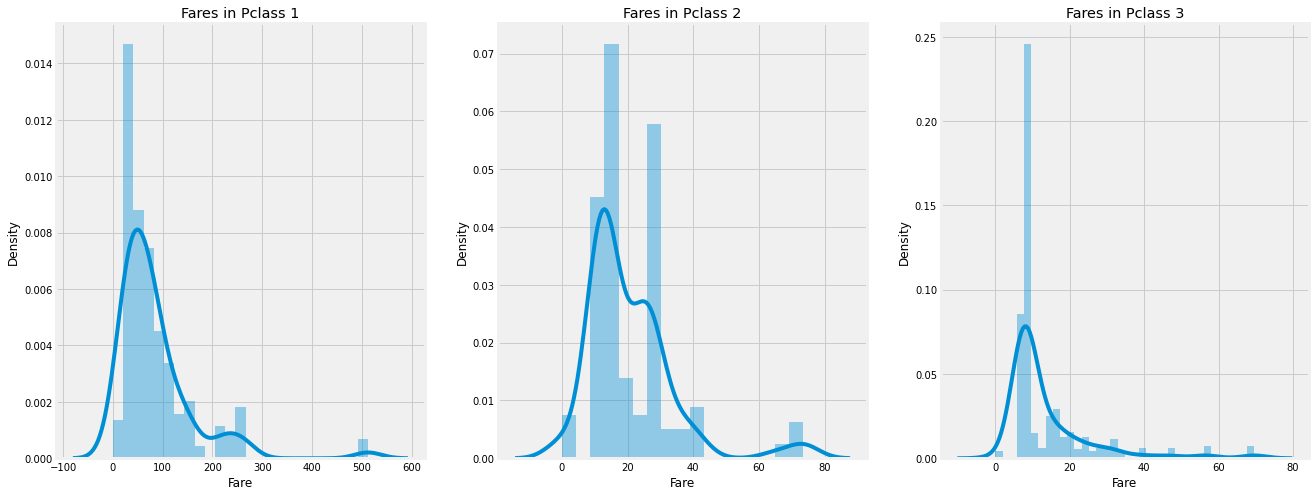

In [41]:
f, ax = plt.subplots(1,3, figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

연속적인 값에 대해 binning을 이용하여 discrete values로 변환할 필요가 있다.

## 특징들 정리

1. Sex
  - 여성이 남성보다 더 많이 생존
2. Pclass
  - 통상 1st class가 생존에 더 많은 기회를 얻은 반면, 3rd Pclass는 매우 낮다.
  - 여성의 경우, 2nd class보다 1st class가 더 많이 생존하였다,
3. Age
  - 5-10세의 아이들이 생존을 많이 했고, 15-35세가 가장 많이 생존하지 못 했다.
4. Embarked
  - C항구에서 탑승한 승객들이 좋은 생존률을 보였다. 심지어 S항구 + 1st class보다 높은 수치를 보였음
  - Q항구는 모두 3rd class 승객들이었다.
5. Parch + SibSp
  - 혼자거나 4명 이상의 가족과 함께 탑승한 승객들은 생존률이 좋지 못 했다.
  


## 특징들 사이에서의 상관관계


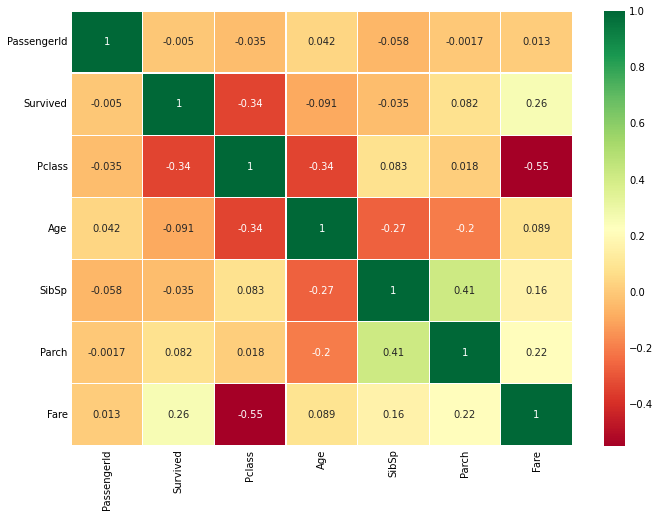

In [45]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) # data.corr()를 상관관계 행렬로 변환
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- 우선 알아야할 것이, String값이나 알파벳값들은 비교하기 애매해서 숫자 특징들만 비교되었음

- A와 B가 1에 가까운 값을 갖고 있다면 서로 비례관계임

### 다중공선성 MultiColinearity
  - 서로 높은 비례관계를 가진 상태이므로 redundant feature
  - 서로 비슷한 정보를 가지고 있으므로 제거할 필요가 있음

위의 경우, SibSp - Parch가 0.41로 가장 큰데, 따로 제거할 필요 없어보인다.

  

# (2) Feature Engineering and Data Cleaning

특징공학 Feature Engineering 이란 ?
- 새로운 특징을 뽑아내거나, MultiColinearity를 확인해 redundant feature를 제거하는 것 

여기서는 Name의 특징을 이용해 새로운 특징을 얻을 것이고, 적절한 특징 들을 모델에 예측하기에 알맞는 형태로 바꿀 것임

## Age_band
**Age 특징의 문제점**
 
Age는 continous특징이기 때문에 ML estimator에 train할 때 문제가 있을 수 있음
이러한 값을 **binning or 정규화**를 이용해 **범주형 특징**으로 바꿀 것임
<br>
여기서는 binning을 이용할 건데, grouping하는 거임 그냥

### binning
0-80 Age를 5개의 그룹으로 나누자

In [46]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[data['Age']>16, 'Age_band'] = 1
data.loc[data['Age']>32, 'Age_band'] = 2
data.loc[data['Age']>48, 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [53]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


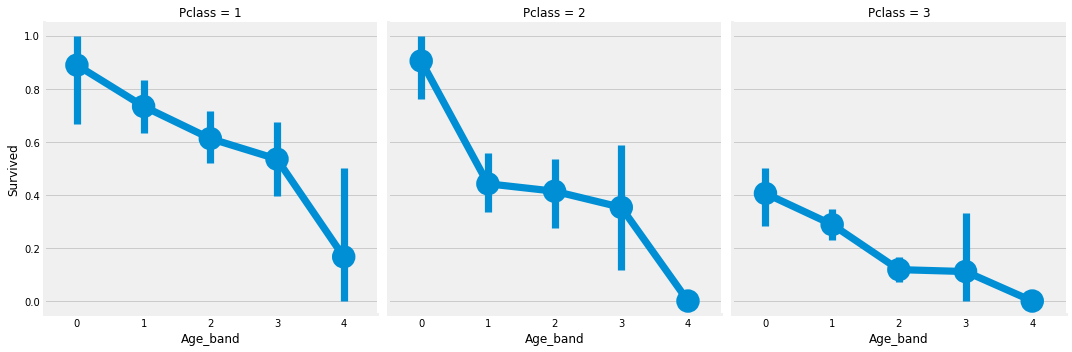

In [55]:
sns.factorplot('Age_band','Survived', data=data, col='Pclass')
plt.show()

Pclass보다 Age가 생존여부에 더 많은 영향을 끼치는 것을 볼 수 있다.

## Family Size와 혼자탑승 여부
SibSp와 Parch 특징의 합계값이 생존여부와 관계있는지 확인해보자

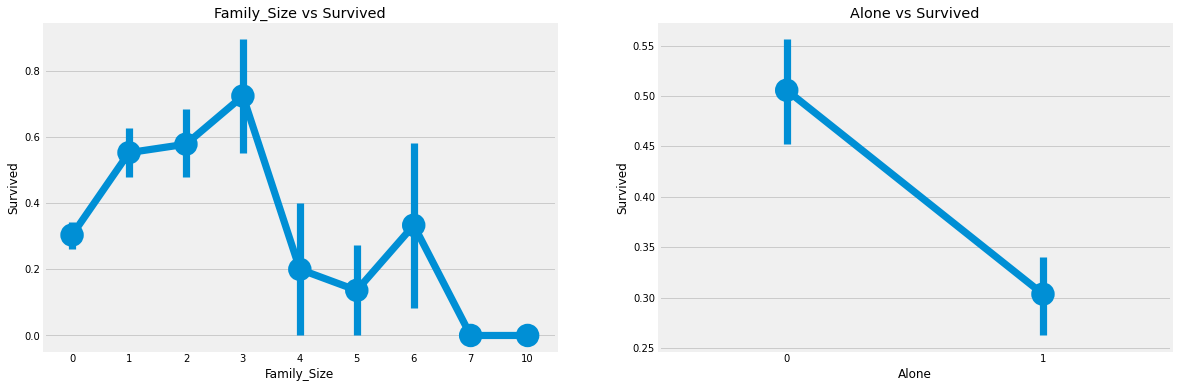

In [59]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']

data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

f,ax = plt.subplots(1,2,figsize = (18,6))
sns.pointplot('Family_Size', 'Survived', data = data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.pointplot('Alone', 'Survived', data=data, ax = ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

혼자이거나 Family_Size가 4이상이면 생존확률이 떨어진 것을 볼 수 있음

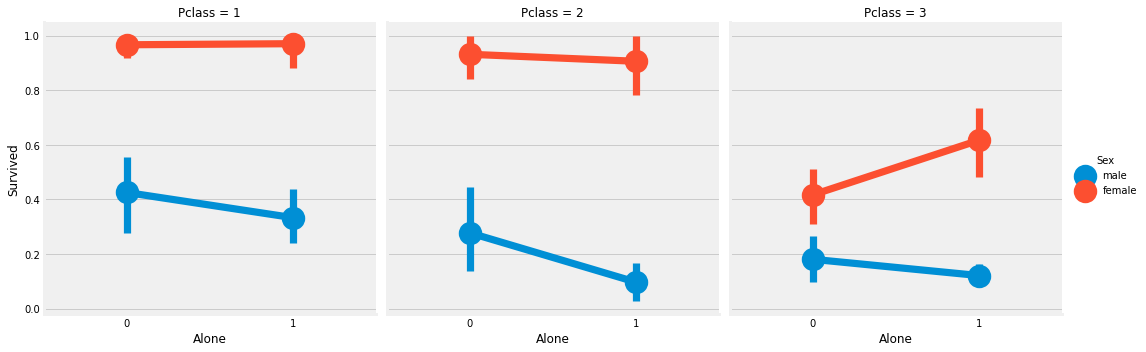

In [60]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

3rd class의 가족이 있는 여성을 제외하고, Sex와 Pclass보다 혼자 여부가 더 영향이 크다는 것을 알 수 있다.

## Fare_Range
Fare또한 continous 특징이기에 ordinal 값으로 변환할 필요가 있다.

### binning 

**pandas.qcut**
 
bins값만 넘겨주면 알아서 split해준다.

In [65]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


운임료가 올라가면 생존확률도 올라감

이제, Age에서 한 것 처럼 Fare_Range도 binning 하자

In [66]:
data['Fare_cat'] = 0
data.loc[data['Fare'] > 0, 'Fare_cat'] = 0
data.loc[data['Fare'] > 7.91, 'Fare_cat'] = 1
data.loc[data['Fare'] > 14.454, 'Fare_cat'] = 2
data.loc[data['Fare'] > 31, 'Fare_cat'] = 3

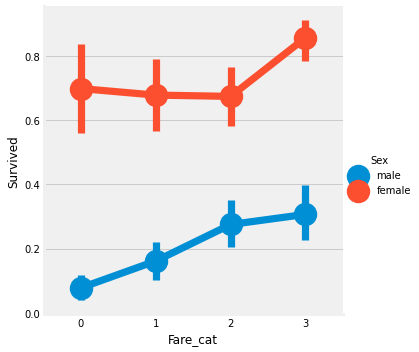

In [67]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

Fare_cat이 올라가면 생존확률도 올라가는데, Sex값과 함께 중요한 값이 될 것 같다

## String -> Numeric 범주형 특징 변환하기

이제 Sex, Embarked 등..을 숫자형 값으로 변환하자

In [70]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

## 필요없는 특징 지우기

- Name : 범주형 값으로 변환할 수 없음
- Age : Age_band 값으로 변환
- Ticket : 범주형 값으로 변환할 수 없음
- Fare : Fare_cat 으로 변환
- Cabin : 결측치가 많고, 두 개 이상의 cabins값들이 있어 쓸모없음
- Fare_Range : Fare_cat 으로 변환
- PassengerId : 범주형 값으로 변환할 수 없음

In [72]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(), cmap='RdYlGn', linewidths=0.2, annot=True, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

KeyError: ignored

절댓값이 큰 몇몇 상관관계를 확인할 수 있다

# (3) 예측 모델링

EDA파트, 데이터 전처리 파트에서 진행한 걸로는 생존 여부를 정확히 예측할 수 없다.
분류 알고리즘을 이용하자

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
#
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 

In [74]:
train,test = train_test_split(data, test_size=0.3, random_state = 0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

## rbf-SVM

In [ ]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

## linear-SVM

In [ ]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

## 로지스틱 회귀

In [76]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


## 결정트리

In [77]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


## KNN

In [78]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


KNN의 정확도는 몇 개의 n 값을 설정해주냐에 따라 달라진다. (default = 5)

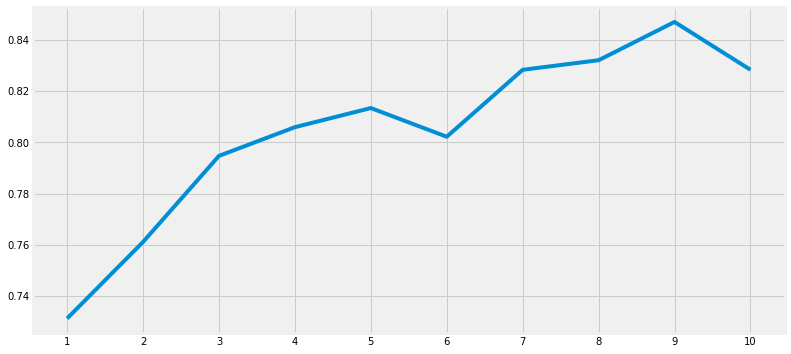

최대 값은 0.8470149253731343


In [82]:
temp_data_index = list(range(1,11))
temp_data = pd.Series()
x = list(range(1,11))
for i in list(range(1,11)) :
  model = KNeighborsClassifier(n_neighbors= i)
  model.fit(train_X, train_Y)
  prediction=model.predict(test_X)
  temp_data=temp_data.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(temp_data_index, temp_data)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('최대 값은', temp_data.values.max())

## 가우시안 Naive Bayes

In [ ]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

## 랜덤포레스트

In [83]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8134328358208955


분류기가 90퍼를 달성했을 때, 새로운 훈련데이터와 테스트 데이터 또한 90%정확도를 기록할리가 없다. -> **model variance**


# (4) Cross Validation
model variance문제를 해결하고 일반화된 모델을 얻기위해 사용

여기서는 k-fold CV방법을 이용한다.

In [93]:
from sklearn.model_selection import KFold,cross_val_score, cross_val_score, cross_val_predict

kfold = KFold(n_splits = 10, random_state = 22, shuffle=True)
accuracy = []
std = []
xyz = []

classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

for i in models :
  model = i
  cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.802497,0.047588
Naive Bayes,0.795843,0.054861
Random Forest,0.811486,0.050776


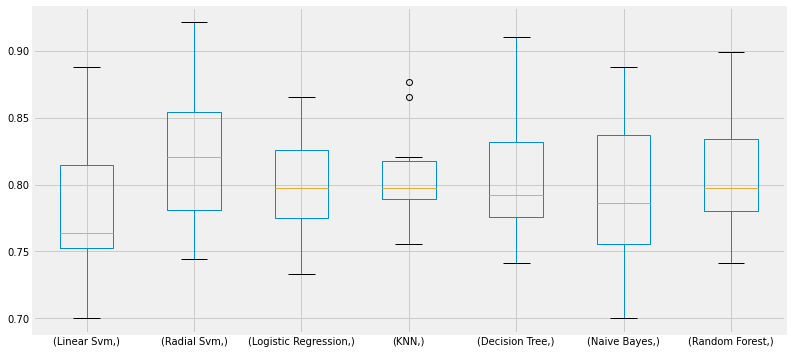

In [95]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

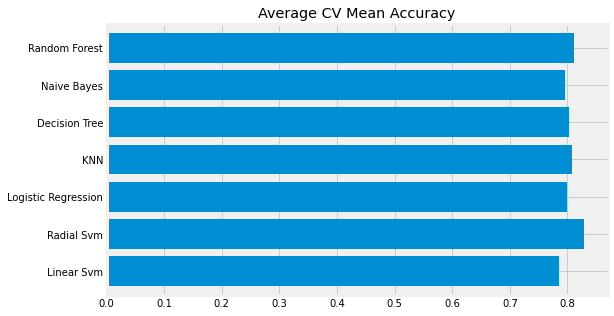

In [97]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

분류 정확도는 때때로 data imbalance에 의해 달라질 수 있음. confusion matrix의 도움으로 요약된 결과를 얻을 수 있다.

### Confusion Matrix
분류기에 의해 만들어진 분류가 맞는지 틀린지 확인

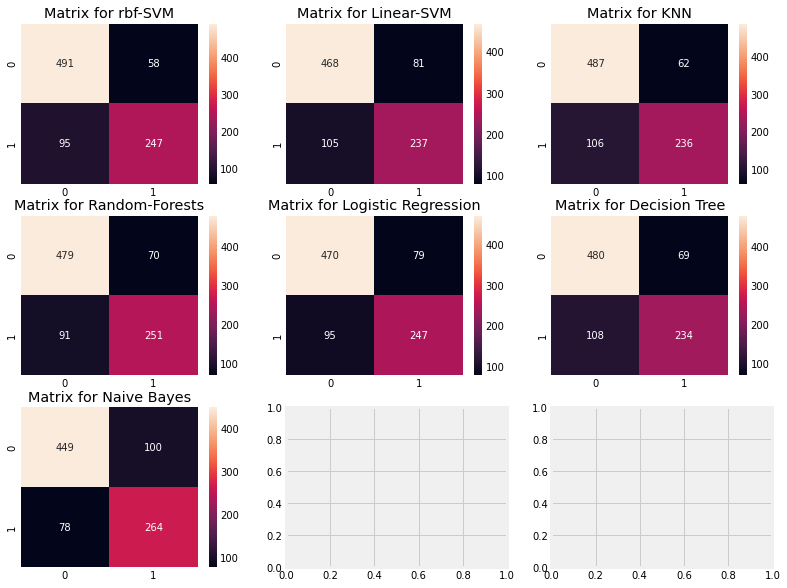

In [99]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

왼쪽은 맞는지, 오른쪽은 틀린지를 확인할 수 있다.
i.g. rbf-SVM
- 491(사망) + 247(생존) + CV 정확도 82.8%
- 58명의 사망자를 생존으로, 95명의 생존자를 사망자로 처리

결론적으로 rbf-SVM이 사망자를, NavieBayes가 생존자를 제일 잘 예측함을 알아낼 수 있었다.

## Hyper-Parameters 튜닝
파라미터를 무엇으로 주느냐에 따라 분류기의 성능이 달라지므로 최적의 파라미터 튜닝이 필요하다

여기선 제일 성능 좋은 분류기만 진행하겠음 i.g. SVM, 랜덤포레스트

### a. SVM

In [110]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.25, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = list(np.arange(0.1, 1.1, 0.1))
kernel = ['rbf', 'linear']
hyper = {'kernel': kernel, 'C':C, 'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid = hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
0.8282593685267716
SVC(C=0.4, gamma=0.30000000000000004)


### b. 랜덤포레스트

In [117]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


Rbf-SVM의 경우 82.82% with C=4, gamma=0.3, 랜덤포레스트의 경우 81.9% with n_estimators=300 일때 최고의 정확도를 냈다.

# (5) 앙상블